<a href="https://colab.research.google.com/github/eunhobang/ICT-AI-education/blob/main/8_23_3%EC%9D%BC%EC%B0%A83%EA%B0%95_CNN%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from tensorflow import keras
keras.__version__

'2.8.0'

In [13]:
%whos

Variable         Type          Data/Info
----------------------------------------
keras            module        <module 'tensorflow.keras<...>i/_v2/keras/__init__.py'>
layers           module        <module 'keras.api._v2.ke<...>eras/layers/__init__.py'>
mnist            module        <module 'keras.api._v2.ke<...>asets/mnist/__init__.py'>
model            Sequential    <keras.engine.sequential.<...>object at 0x7f35b19ffc50>
models           module        <module 'keras.api._v2.ke<...>eras/models/__init__.py'>
test_images      ndarray       10000x28x28x1: 7840000 elems, type `float32`, 31360000 bytes (29.9072265625 Mb)
test_labels      ndarray       10000x10: 100000 elems, type `float32`, 400000 bytes (390.625 kb)
to_categorical   function      <function to_categorical at 0x7f35b5ee05f0>
train_images     ndarray       60000x28x28x1: 47040000 elems, type `float32`, 188160000 bytes (179.443359375 Mb)
train_labels     ndarray       60000x10: 600000 elems, type `float32`, 2400000 bytes (2

In [14]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # (3,3)채널을 32번씩 밀어라 # 32는 필터의 수
# 필터: 특징을 분리 하는 역할을 함
# input_shape=(28, 28, 1) 3차원이라서 흑백
# ㄴ 1채널은 흑백이고, 3채널은 컬러다(RGB)->(28,28,3)

model.add(layers.MaxPooling2D((2, 2))) # MaxPooling2D: 위 코드에서 걸러진 걸(얻은 걸) 것 중 가장 큰 값을 압축하는 과정
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #relu 은닉층에 쓰임
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

![image.png](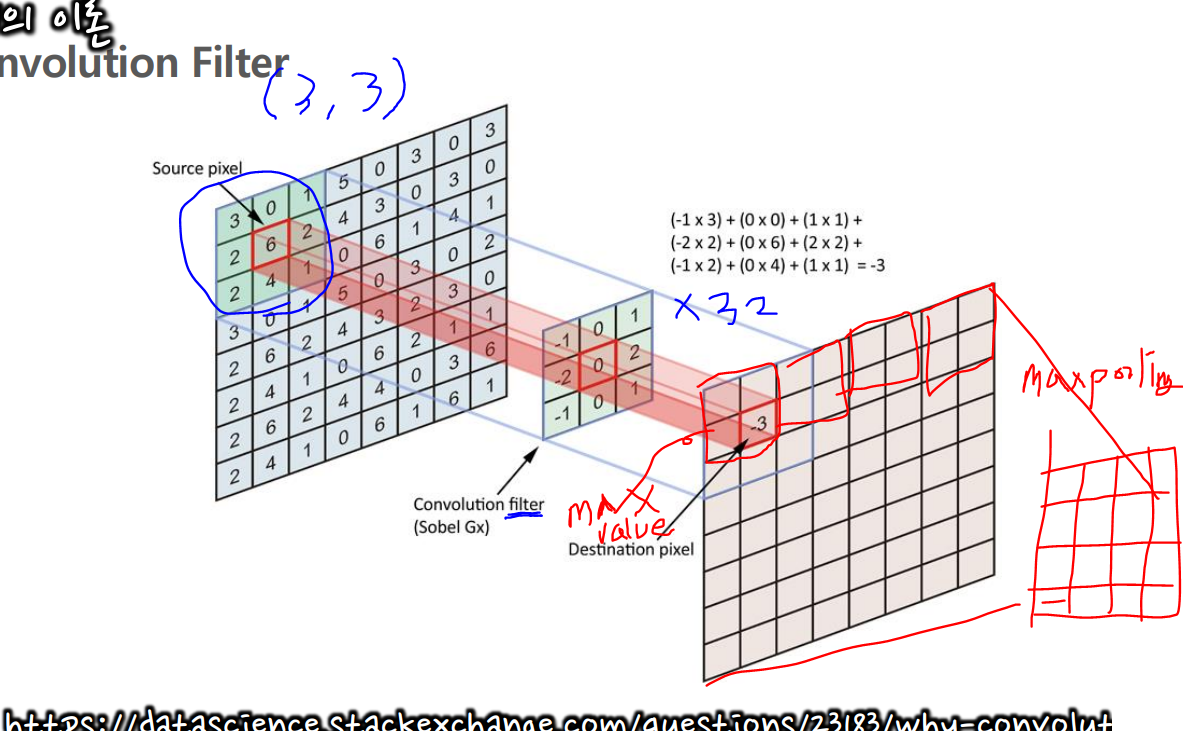+YxoQ8s2oRJvHxW6nn9ii3jbcoDm3Eka8WWwe7P1jBCH77tKvAAePV19dR3jSY0F9CKhe7ExERGjBhBTU0NGzZsoLGxEa/Xi8fjoZ8lnRlvXpKZ165cVuSp+8xGfiUXR+OYsFVsaxN8HH51B22SARR8HFt5BwZR5+Lj43G73QwbNoy0tDT69XMyeWcHwa6xiUlxip6azWZsNhuxsbFEmifQKBlC31GW5YQ+lBvueJZjvQqDn0uHVlN+o55b5LZdgcuvVBAtxnwSw+r48eOpqamhrq6OF154gXXr1rF+/Xo2bNhAfX09GzdupKGhgc2bN/Piiy/y+OOPU15ejtPpFFu4rkc8da0+5w7MYsugwWBQWsrC6fqjgzCKOXlaWhqpqanEx8eLsWy/IF2fYlMevJR2KC0Jk17mbI9qgXB5PwsyA+ysaWlpjBs3joULF7Jq1SoWLFhAcXExdrudiIiYa/arZtUDsMPhwGQyBdYUW8Eukb3K376Ve4NsqJ5RL52RmdWOLs8lSmcnf+52Pvle5f0vtFB7SzSaiByWHZX6oz9jTYleZh4eMmQIw4YNk1nI9Pl1KG6gnrt7aWv/L3398stwu0IyAAAAAElFTkSuQmCC)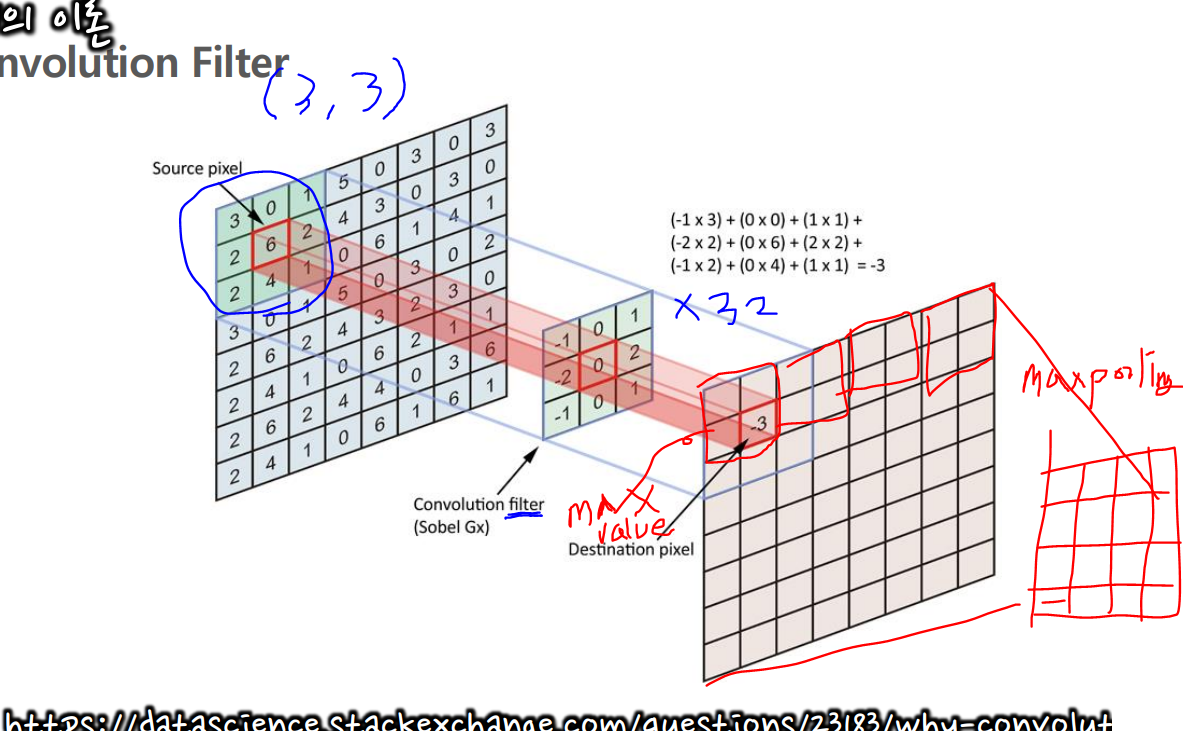

maxPooling의 param이 0인 이유는 학습이 아닌 데이터를 걸르는 과정이기 때문에 param이 0이 나옴

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
Total params: 92,672
Trainable params: 92,672
Non-trai

In [16]:
model.add(layers.Flatten()) # input으로 사용하기 위해 행렬이 아닌 list로 만들어주는 과정이 필요한데 flatten layer가 그 역할을 함(2차원->1차원)
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 1152)             

In [18]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [19]:
print(len(train_images))
print(len(train_labels))
print(len(test_images))
print(len(test_labels))

60000
60000
10000
10000


In [20]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [21]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=7, batch_size=64)

Epoch 1/7
938/938 [==============================] - 62s 65ms/step - loss: 0.1589 - accuracy: 0.9502
Epoch 2/7
938/938 [==============================] - 60s 64ms/step - loss: 0.0423 - accuracy: 0.9870
Epoch 3/7
938/938 [==============================] - 60s 64ms/step - loss: 0.0290 - accuracy: 0.9909
Epoch 4/7
938/938 [==============================] - 58s 62ms/step - loss: 0.0224 - accuracy: 0.9934
Epoch 5/7
938/938 [==============================] - 58s 62ms/step - loss: 0.0161 - accuracy: 0.9949
Epoch 6/7
938/938 [==============================] - 59s 63ms/step - loss: 0.0132 - accuracy: 0.9962
Epoch 7/7
938/938 [==============================] - 59s 63ms/step - loss: 0.0114 - accuracy: 0.9965


In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 11ms/step - loss: 0.0375 - accuracy: 0.9924


In [23]:
test_acc

0.9923999905586243

In [24]:
model.save('cnn.h5')